## learning-AI : install_pytorch
### topic 5 : 5강

<br>

- **임규연 (lky473736)**
- 2025.07.26. ~ 2025.07.28.
- Reference
    - https://www.youtube.com/watch?v=gzJt_qjZJ7M&list=PL_iJu012NOxdhFmM2aw6bwpZTMFdsPxws

------

### 5-1강. categorical classification using FCNN (multi)

In [2]:
import torch
from torchvision import datasets, transforms
# datasets : MNIST, CIFAR-10...
# transforms : 이미지 변형 (aug)
import matplotlib.pyplot as plt

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print (device)

cpu


In [4]:
transform = transforms.ToTensor() # tensor로 바꿔줘야함
train_DS = datasets.MNIST(root='./', 
                         train=True,
                         download=True,
                         transform=transform)
test_DS = datasets.MNIST(root='./', 
                         train=False,
                         download=True,
                         transform=transform)

print (train_DS)
print (test_DS)
print (len(train_DS))
print (len(test_DS))

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()
60000
10000


In [5]:
print (train_DS.classes)
print (test_DS.classes)
print (train_DS.data.shape)
print (test_DS.data.shape)

['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOMMMMMMMMMMMMOOOO
OOOOOOOOMMMMMMMMMMMMMMMMOOOO
OOOOOOOMMMMMMMMMMMMMMMMOOOOO
OOOOOOOMMMMMMMMMMMOOOOOOOOOO
OOOOOOOOMMMMMMMOMMOOOOOOOOOO
OOOOOOOOOMMMMMOOOOOOOOOOOOOO
OOOOOOOOOOOMMMMOOOOOOOOOOOOO
OOOOOOOOOOOMMMMOOOOOOOOOOOOO
OOOOOOOOOOOOMMMMMMOOOOOOOOOO
OOOOOOOOOOOOOMMMMMMOOOOOOOOO
OOOOOOOOOOOOOOMMMMMMOOOOOOOO
OOOOOOOOOOOOOOOMMMMMOOOOOOOO
OOOOOOOOOOOOOOOOOMMMMOOOOOOO
OOOOOOOOOOOOOOMMMMMMMOOOOOOO
OOOOOOOOOOOOMMMMMMMMOOOOOOOO
OOOOOOOOOOMMMMMMMMMOOOOOOOOO
OOOOOOOOMMMMMMMMMMOOOOOOOOOO
OOOOOOMMMMMMMMMMOOOOOOOOOOOO
OOOOMMMMMMMMMMOOOOOOOOOOOOOO
OOOOMMMMMMMMOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOOO


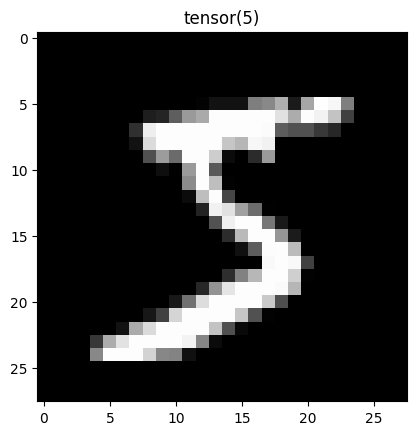

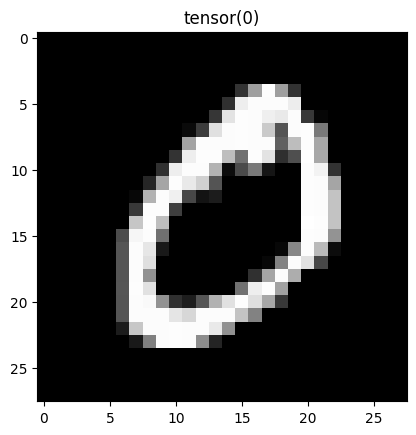

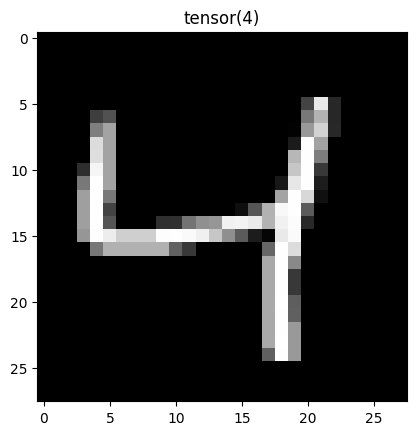

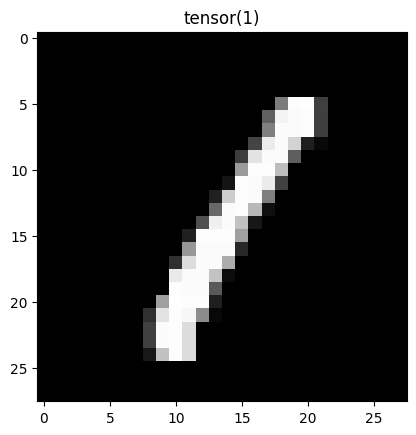

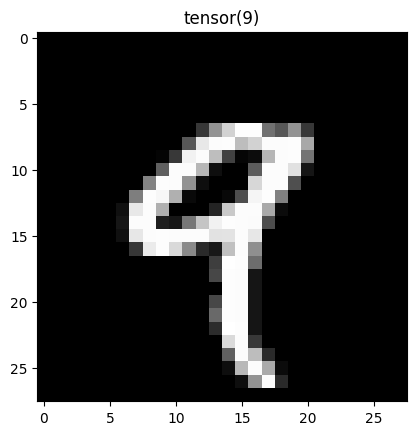

In [6]:
for i in range (28) :
    for j in range (28) :
        if train_DS.data[0][i, j] != 0 :
            print ('M', end='')
        else : 
            print ('O', end='')
    print()
    
for i in range (5) : 
    plt.title(train_DS.targets[i])
    plt.imshow(train_DS.data[i],
          cmap='gray')
    plt.show()

In [7]:
'''
    Minibatch gradient descent 위해선 배치사이즈가 당연히 필요하다
    Minibatch GD를 할 때는 Dataloader가 반드시 필요하다.
''' 

batch_size = 32

train_DL = torch.utils.data.DataLoader(train_DS,
                                      batch_size=batch_size,
                                      shuffle=True) # 만약 shuffle하지 않으면 처음부터 데이터가 읽어짐
test_DL = torch.utils.data.DataLoader(test_DS,
                                      batch_size=batch_size,
                                      shuffle=True)

print (train_DL.dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


In [8]:
X_batch, y_batch = next(iter(train_DL))
# iter의 역할 : iteration과 next가 같이 쓰여서 특정 묶음을 계속 내보내주는 것
# 데이터 배치 하나만 꺼내기
# next와 iter는 항상 같이 다닌다

print (X_batch.shape,
      y_batch.shape)

'''
    ToTensor의 역할
    - tensor로 바꿔준다
    - 갯수 * 채널 행열로 바꿔준다 (4D로 바꿔줌)
        - 갯수 * 채널 * 가로크기 * 세로크기
    - int -> float (0~1사이로 바꿔줌 : z-score normalization)
'''

torch.Size([32, 1, 28, 28]) torch.Size([32])


'\n    ToTensor의 역할\n    - tensor로 바꿔준다\n    - 갯수 * 채널 행열로 바꿔준다 (4D로 바꿔줌)\n        - 갯수 * 채널 * 가로크기 * 세로크기\n    - int -> float (0~1사이로 바꿔줌 : z-score normalization)\n'

In [9]:
# flatten

print (X_batch.shape)
flat1 = torch.flatten(X_batch) # 그냥 전부 쫙 핌
print (flat1.shape)
flat2 = torch.flatten(X_batch,
                     start_dim=1) # 갯수는 보존하고 그 나머지를 핀다
print (flat2.shape)

torch.Size([32, 1, 28, 28])
torch.Size([25088])
torch.Size([32, 784])


In [10]:
# MLP

from torch import nn 
from torchinfo import summary

class MLP (nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.layer1 = nn.Linear(28*28, 100)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(100, 10) # class가 10개
        # 파이토치에서 마지막에 Softmax 두지 않는 이유 (binary classification 시에는 뒤에 sigmoid 두었었음)
        # == 
        
    def forward(self, x) : 
        x = torch.flatten(x, 
                          start_dim=1) # flatten (갯수를 보존하고)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        return x
    
'''
    GPU 사용하려면
    - batch 또한 to(device) 위에 올려져 있어야 하고
    - model 또한 to(device) 위에 올려져 있어야 함
'''

model = MLP().to(device) # <--- gpu 혹은 cpu 위로 올린다
print (model)
X_batch, _ = next(iter(train_DL))
print (model(X_batch.to(device)).shape)
summary(model, 
       input_size=(32, 1, 28, 28))

# [32, 10]의 의미 : 32개의 이미지별로 0일 logit, 1일 logit...

MLP(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=100, out_features=10, bias=True)
)
torch.Size([32, 10])


Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [32, 10]                  --
├─Linear: 1-1                            [32, 100]                 78,500
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 10]                  1,010
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 2.54
Input size (MB): 0.10
Forward/backward pass size (MB): 0.03
Params size (MB): 0.32
Estimated Total Size (MB): 0.45

epoch 1, running loss 0.31527551653583846
epoch 2, running loss 0.1415863748162985
epoch 3, running loss 0.09726579906915625
epoch 4, running loss 0.07363661511521787
epoch 5, running loss 0.05911751433915148
epoch 6, running loss 0.04808507058089599
epoch 7, running loss 0.039242658771419275
epoch 8, running loss 0.03367991646022225
epoch 9, running loss 0.028540228455637893
epoch 10, running loss 0.02592319776620716


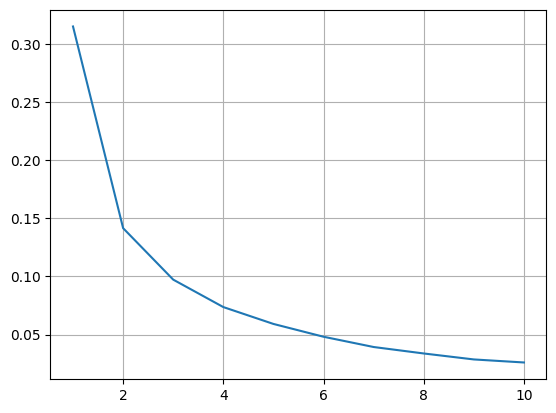

In [11]:
from torch import optim

optimizer = optim.AdamW(model.parameters(),
                      lr=0.001)
critrion = nn.CrossEntropyLoss() # 이진은 BCE, 다중은 CE
epoch = 10

# def train (model,
#           train_DL,
#           critrion,
#           optimizer,
#           epoch) :
loss_history = []
N = len(train_DL.dataset) # train 데이터셋의 갯수

model.train()
for ep in range (epoch) : 
    rloss = 0 # running loss
    # batch마다 누적되어 있는 loss

    for X_batch, y_batch in train_DL : # 32개의 이미지, 32개의 레이블
        X_batch = X_batch.to(device) # GPU에 올리기
        y_batch = y_batch.to(device)

        # inference
        y_hat = model.forward(X_batch)

        # loss
        loss = critrion(y_hat, y_batch)

        # deriviate
        optimizer.zero_grad()
        loss.backward()

        # update
        optimizer.step()
        
        # loss accumulation
        loss_b = loss.item() * X_batch.shape[0] # batch의 loss
        '''
            X_batch.shape[0]을 곱한 이유
            : critrion은 항상 평균을 하기 때문에, 전체 X_batch의 사이즈를 곱함으로써 
            그걸 무효한다. 그니깐 각 배치마다의 loss의 총합을 구해내고 싶은 것이다
        '''
        rloss += loss_b # batch loss의 총합
        
    running_loss = rloss/N # batch loss 총합 / 전체 데이터 갯수
    loss_history.append (running_loss)
    
    print (f"epoch {ep+1}, running loss {running_loss}")
    
plt.plot([ep+1 for ep in range (epoch)],
        loss_history)
plt.grid()
plt.show()

- CrossEntropyLoss를 사용할 때 Softmax를 종단에 두면 안되는 이유 (모델 끝에 두면 안되는 이유)
    - **놀랍게도, nn.CrossEntropyLoss()가 Softmax를 이미 포함하고 있음**
    - 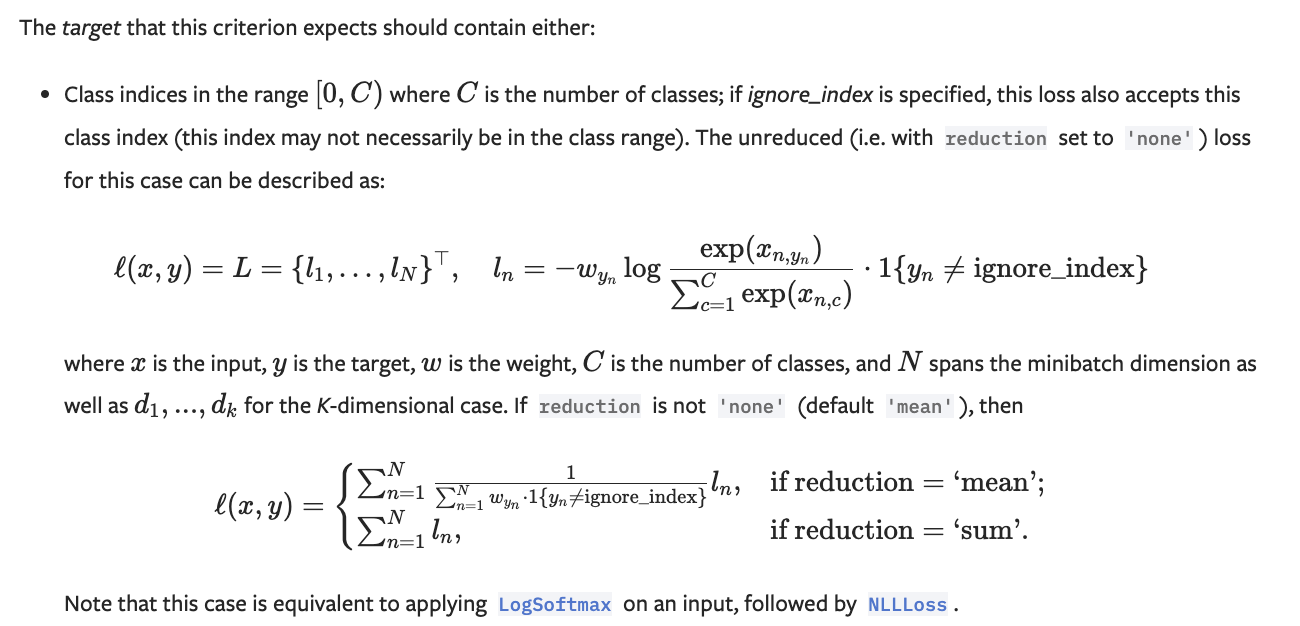

In [12]:
# 모델 저장하기

path = './MNIST_MLP.pt' # pt가 확장자
torch.save(model.state_dict(),  # 모델의 가중치가 저장되는 것임
          path)

load_model = MLP().to(device) # 불러올때는 모델의 스키마는 짠 상태여야만 한다
load_model.load_state_dict(torch.load(path,
                                     map_location=device))
print (load_model)

MLP(
  (layer1): Linear(in_features=784, out_features=100, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=100, out_features=10, bias=True)
)


test acc : 97.76

[Classification Report]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.98      0.98      1010
           4       0.96      0.99      0.97       982
           5       0.97      0.98      0.97       892
           6       0.99      0.97      0.98       958
           7       0.97      0.98      0.98      1028
           8       0.97      0.97      0.97       974
           9       0.98      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


[Confusion Matrix]
[[ 964    0    2    1    1    2    1    3    4    2]
 [   0 1123    4    0    0    1    1    2    4    0]
 [   2    1 1005    2    6    0    2    5    7    2]
 [   0    0    7  98

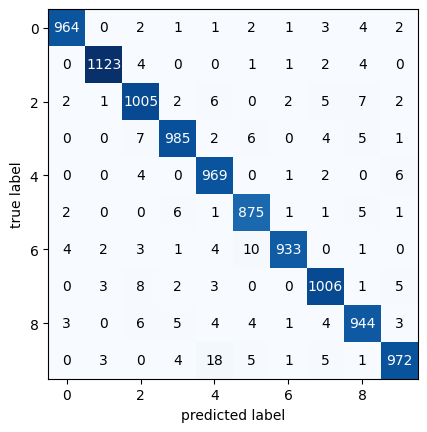

In [13]:
# test

all_preds = []
all_labels = []

model.eval()  
with torch.no_grad() : 
    rcorrect = 0
    for X_batch, y_batch in test_DL : 
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # inference
        y_hat = model(X_batch) # 이러면 여기엔 logit이 들어와있을것임 softmax니깐
        
        # 맞나, 안맞나 확인
        pred = y_hat.argmax(dim=1) # 레이블 뽑아내기
        
        all_preds.extend(pred.cpu().numpy())
        all_labels.extend(y_batch.cpu().numpy())
        
        corrects_b = torch.sum(pred == y_batch).item()
        # 실제값이랑 예측값이랑 맞는거의 합
        rcorrect += corrects_b
    accuracy_e = rcorrect / len(test_DL.dataset) * 100
    
print (f"test acc : {accuracy_e}")

from sklearn.metrics import classification_report, confusion_matrix

print("\n[Classification Report]")
print(classification_report(all_labels, all_preds))

print("\n[Confusion Matrix]")
cm = confusion_matrix(all_labels, all_preds)
print(cm)

from mlxtend.plotting import plot_confusion_matrix

fig, ax = plot_confusion_matrix(conf_mat=cm)
plt.show()

----

### 5-2강. ConvNet 통한 CIFAR-10 multi-class classification

In [14]:
transform = transforms.ToTensor() # tensor로 바꿔줘야함
train_DS = datasets.CIFAR10(root='./', 
                         train=True,
                         download=True,
                         transform=transform)
test_DS = datasets.CIFAR10(root='./', 
                         train=False,
                         download=True,
                         transform=transform)

print (train_DS)
print (test_DS)
print (len(train_DS))
print (len(test_DS))

100%|█| 170498071/170498071 [00:25<00:00, 6748803


Extracting ./cifar-10-python.tar.gz to ./
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: ToTensor()
50000
10000


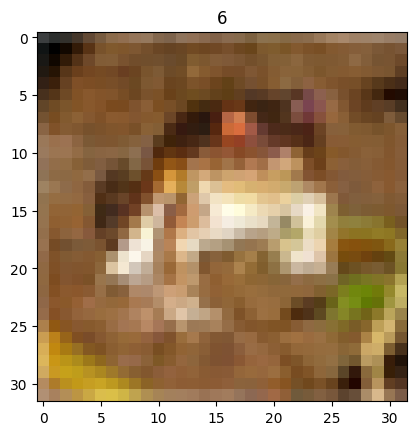

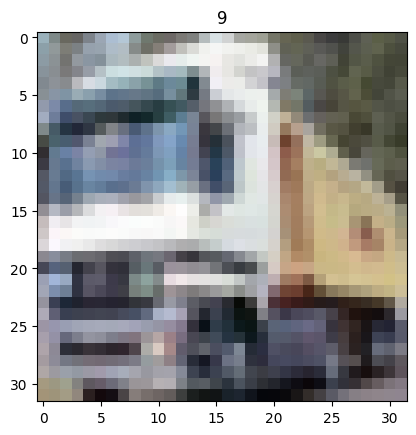

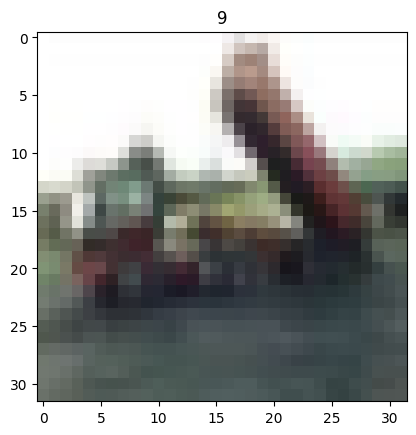

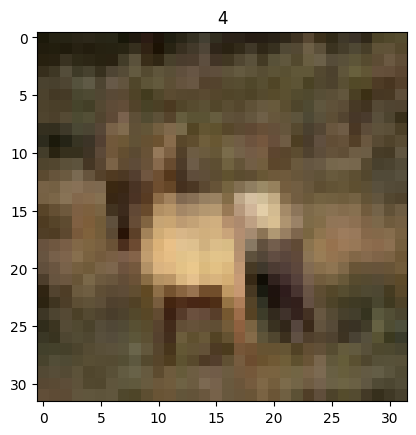

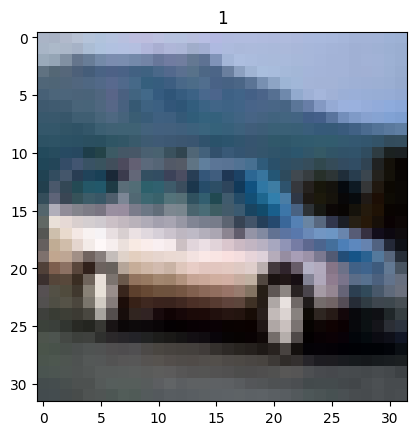

In [18]:
for i in range (5) : 
    plt.title(train_DS.targets[i])
    plt.imshow(train_DS.data[i],
          cmap='gray')
    plt.show()

In [19]:
'''
    Minibatch gradient descent 위해선 배치사이즈가 당연히 필요하다
    Minibatch GD를 할 때는 Dataloader가 반드시 필요하다.
''' 

batch_size = 32

train_DL = torch.utils.data.DataLoader(train_DS,
                                      batch_size=batch_size,
                                      shuffle=True) # 만약 shuffle하지 않으면 처음부터 데이터가 읽어짐
test_DL = torch.utils.data.DataLoader(test_DS,
                                      batch_size=batch_size,
                                      shuffle=True)

print (train_DL.dataset)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: ./
    Split: Train
    StandardTransform
Transform: ToTensor()


In [20]:
X_batch, y_batch = next(iter(train_DL))
# iter의 역할 : iteration과 next가 같이 쓰여서 특정 묶음을 계속 내보내주는 것
# 데이터 배치 하나만 꺼내기
# next와 iter는 항상 같이 다닌다

print (X_batch.shape,
      y_batch.shape)

'''
    ToTensor의 역할
    - tensor로 바꿔준다
    - 갯수 * 채널 행열로 바꿔준다 (4D로 바꿔줌)
        - 갯수 * 채널 * 가로크기 * 세로크기
    - int -> float (0~1사이로 바꿔줌 : z-score normalization)
'''

torch.Size([32, 3, 32, 32]) torch.Size([32])


'\n    ToTensor의 역할\n    - tensor로 바꿔준다\n    - 갯수 * 채널 행열로 바꿔준다 (4D로 바꿔줌)\n        - 갯수 * 채널 * 가로크기 * 세로크기\n    - int -> float (0~1사이로 바꿔줌 : z-score normalization)\n'

In [31]:
print (set(train_DS.targets))
print (torch.flatten(X_batch,
                    start_dim=2).shape)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
torch.Size([32, 3072])


In [54]:
# MLP

from torch import nn 
from torchinfo import summary

class MLP (nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.layer1 = nn.Linear(3*32*32, 100)
        self.layer2 = nn.ReLU()
        self.layer3 = nn.Linear(100, 50)
        self.layer4 = nn.ReLU()
        self.layer5 = nn.Linear(50, 10) # class가 10개
        
    def forward(self, x) : 
        x = torch.flatten(x, 
                          start_dim=1) # flatten (갯수를 보존하고)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        x = self.layer5(x)
        return x
    
model_MLP = MLP().to(device) # <--- gpu 혹은 cpu 위로 올린다
print (model_MLP)
X_batch, _ = next(iter(train_DL))
print (model_MLP(X_batch.to(device)).shape)
summary(model_MLP, 
       input_size=(32, 3, 32, 32))

MLP(
  (layer1): Linear(in_features=3072, out_features=100, bias=True)
  (layer2): ReLU()
  (layer3): Linear(in_features=100, out_features=50, bias=True)
  (layer4): ReLU()
  (layer5): Linear(in_features=50, out_features=10, bias=True)
)
torch.Size([32, 10])


Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [32, 10]                  --
├─Linear: 1-1                            [32, 100]                 307,300
├─ReLU: 1-2                              [32, 100]                 --
├─Linear: 1-3                            [32, 50]                  5,050
├─ReLU: 1-4                              [32, 50]                  --
├─Linear: 1-5                            [32, 10]                  510
Total params: 312,860
Trainable params: 312,860
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 10.01
Input size (MB): 0.39
Forward/backward pass size (MB): 0.04
Params size (MB): 1.25
Estimated Total Size (MB): 1.69

```python
torch.nn.Conv1d(
    in_channels,
    out_channels,
    kernel_size,
    stride=1,
    padding=0,
    dilation=1,
    groups=1,
    bias=True,
    padding_mode='zeros'
)
```

| 파라미터           | 설명                                           |
| -------------- | -------------------------------------------- |
| `in_channels`  | 입력 채널 수<br>예: 단어 임베딩 차원, 센서 개수 등             |
| `out_channels` | 출력 채널 수<br>= 필터 개수                           |
| `kernel_size`  | 필터(커널) 크기<br>예: 3이면 인접한 3개 입력을 보고 하나의 출력을 만듬 |


```python
torch.nn.MaxPool1d(
    kernel_size,
    stride=None,
    padding=0,
    dilation=1,
    return_indices=False,
    ceil_mode=False
)
```

| 파라미터             | 설명                                  |
| ---------------- | ----------------------------------- |
| `kernel_size`    | 풀링할 구역의 크기 (예: 2 → 2개 중 max)        |
| `stride`         | 이동 간격 (기본은 `kernel_size`)           |
| `padding`        | 경계에 0 추가                            |
| `dilation`       | 간격 늘리기 (거의 안 씀)                     |
| `return_indices` | `True`면 max 값의 인덱스도 반환              |
| `ceil_mode`      | `True`면 계산 시 `ceil`, 아니면 `floor` 사용 |


In [55]:
# Deep Conv (using skip conn)

class ConvNet (nn.Module) : 
    def __init__(self) : 
        super().__init__()
        self.conv_block1 = nn.Sequential(
            nn.Conv2d(in_channels=3,
                     out_channels=32,
                     kernel_size=3,
                     padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU()
        )
        self.maxpool1 = nn.MaxPool2d(kernel_size=3,
                                    stride=2)
        self.conv_block2 = nn.Sequential(
            nn.Conv2d(in_channels=32,
                     out_channels=64,
                     kernel_size=3,
                     padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU()
        )
        self.maxpool2 = nn.MaxPool2d(kernel_size=3,
                                    stride=2)
        
        # skip connection을 위한 1x1 conv (32 → 64)
        self.skip_conv = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=1, stride=1),
            nn.BatchNorm2d(64)
        )
        
        self.classifier = nn.Sequential(
            nn.Linear(3136, 100),
            nn.BatchNorm1d(100),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            
            nn.Linear(100, 50),
            nn.BatchNorm1d(50),
            nn.ReLU(),
            nn.Dropout1d(p=0.1),
            
            nn.Linear(50, 10)
        )
        
    def forward(self, x) : 
        x = self.conv_block1(x)
        x = self.maxpool1(x)
        
        skip = self.skip_conv(x)  # Skip 연결 전 처리 (채널 맞춤)
        
        x = self.conv_block2(x)
        x = x + skip  # Skip 연결 (+로 잔차연결)
        
        x = self.maxpool2(x)
        # x = torch.flatten(x, 
        #                  start_dim=1) # flatten (갯수를 보존하고)
        x = x.view(x.size(0), -1)  # flatten to (batch_size, features)
        x = self.classifier(x)
        return x

    
model_CNN = ConvNet().to(device) # <--- gpu 혹은 cpu 위로 올린다
print (model_CNN)
X_batch, _ = next(iter(train_DL))
print (model_CNN(X_batch.to(device)).shape)
summary(model_CNN, 
       input_size=(32, 3, 32, 32))

ConvNet(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (maxpool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (skip_conv): Sequential(
    (0): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (classifier): Sequential(
    (0): Linear(in_features=3136, out_features=100, bias=True)
    (1): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dro

Layer (type:depth-idx)                   Output Shape              Param #
ConvNet                                  [32, 10]                  --
├─Sequential: 1-1                        [32, 32, 32, 32]          --
│    └─Conv2d: 2-1                       [32, 32, 32, 32]          896
│    └─BatchNorm2d: 2-2                  [32, 32, 32, 32]          64
│    └─ReLU: 2-3                         [32, 32, 32, 32]          --
├─MaxPool2d: 1-2                         [32, 32, 15, 15]          --
├─Sequential: 1-3                        [32, 64, 15, 15]          --
│    └─Conv2d: 2-4                       [32, 64, 15, 15]          2,112
│    └─BatchNorm2d: 2-5                  [32, 64, 15, 15]          128
├─Sequential: 1-4                        [32, 64, 15, 15]          --
│    └─Conv2d: 2-6                       [32, 64, 15, 15]          18,496
│    └─BatchNorm2d: 2-7                  [32, 64, 15, 15]          128
│    └─ReLU: 2-8                         [32, 64, 15, 15]          --
├─Max

In [56]:
print(y_batch.shape)  # (batch_size, 10) 이면 one-hot
print(y_batch[0])     # 값들이 0,1로 분포하는지 확인

torch.Size([32])
tensor(8)


MLP TIME
epoch 1, running loss 1.6934818279647827
epoch 2, running loss 1.63356100730896
epoch 3, running loss 1.5876977660369873
epoch 4, running loss 1.5488087491607665
epoch 5, running loss 1.522937682762146
epoch 6, running loss 1.5078561140060425
epoch 7, running loss 1.4908371319580078
epoch 8, running loss 1.4720914405441283
epoch 9, running loss 1.4643934392166138
epoch 10, running loss 1.4535817806625366


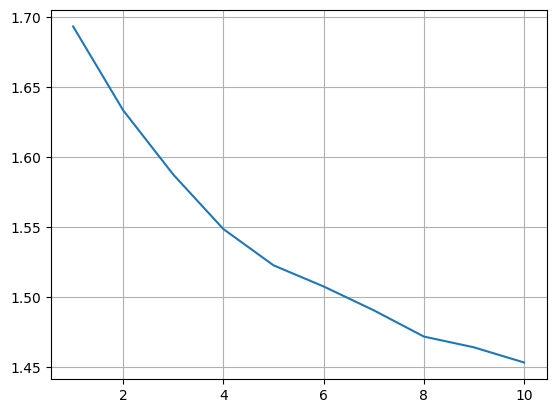

test acc : 47.75

[Classification Report]
              precision    recall  f1-score   support

           0       0.50      0.55      0.52      1000
           1       0.56      0.65      0.60      1000
           2       0.37      0.28      0.32      1000
           3       0.34      0.15      0.21      1000
           4       0.47      0.33      0.39      1000
           5       0.38      0.42      0.40      1000
           6       0.45      0.63      0.53      1000
           7       0.57      0.49      0.53      1000
           8       0.51      0.73      0.60      1000
           9       0.52      0.54      0.53      1000

    accuracy                           0.48     10000
   macro avg       0.47      0.48      0.46     10000
weighted avg       0.47      0.48      0.46     10000


[Confusion Matrix]
[[547  49  43   9  11  17  27  26 214  57]
 [ 41 650  11   9   6  18  16  22  84 143]
 [113  44 275  39 121  99 156  64  64  25]
 [ 51  50  78 153  29 283 185  50  53  68]
 [ 80  

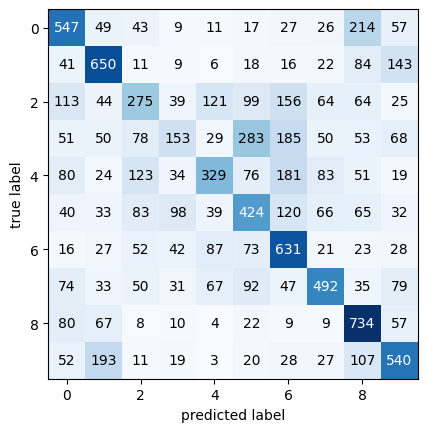

CONVNET TIME
epoch 1, running loss 1.396805690612793
epoch 2, running loss 1.1411197274971008
epoch 3, running loss 1.030576024017334
epoch 4, running loss 0.9728109379005432
epoch 5, running loss 0.9112635309600831
epoch 6, running loss 0.859681848640442
epoch 7, running loss 0.8247437924766541
epoch 8, running loss 0.7890653533363342
epoch 9, running loss 0.7517607944488526
epoch 10, running loss 0.7282169249534607


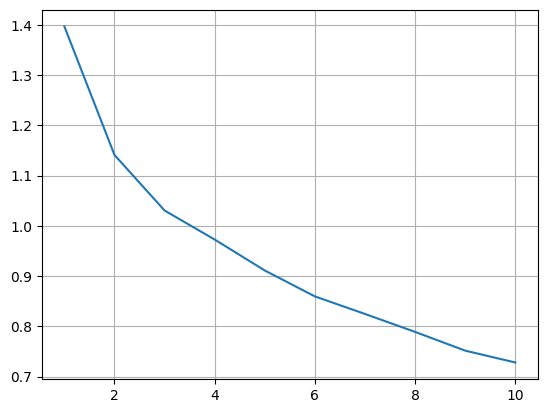

test acc : 74.16

[Classification Report]
              precision    recall  f1-score   support

           0       0.76      0.80      0.78      1000
           1       0.92      0.75      0.83      1000
           2       0.71      0.59      0.64      1000
           3       0.57      0.61      0.59      1000
           4       0.68      0.77      0.72      1000
           5       0.72      0.58      0.64      1000
           6       0.87      0.73      0.79      1000
           7       0.81      0.78      0.79      1000
           8       0.76      0.89      0.82      1000
           9       0.69      0.92      0.79      1000

    accuracy                           0.74     10000
   macro avg       0.75      0.74      0.74     10000
weighted avg       0.75      0.74      0.74     10000


[Confusion Matrix]
[[802   9  20  14  18   4   6   7  68  52]
 [ 24 750   8   3   3   3   3   2  51 153]
 [ 76   2 590  53 113  36  40  35  29  26]
 [ 28   5  57 606  65  98  22  42  37  40]
 [ 22  

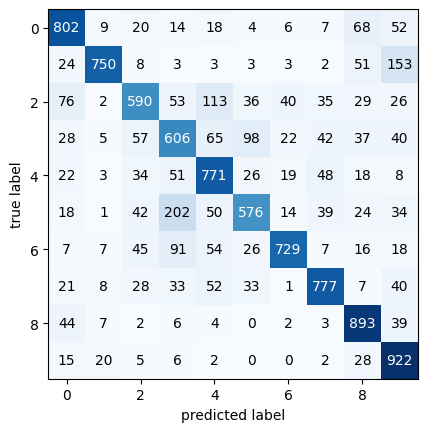

In [59]:
from torch import optim

for i, model in enumerate([model_MLP, model_CNN]) : 
    if i == 0 : 
        print ('MLP TIME')
    else : 
        print ('CONVNET TIME')
        
    optimizer = optim.AdamW(model.parameters(),
                          lr=0.001)
    critrion = nn.CrossEntropyLoss() # 이진은 BCE, 다중은 CE
    epoch = 10

    # def train (model,
    #           train_DL,
    #           critrion,
    #           optimizer,
    #           epoch) :
    loss_history = []
    N = len(train_DL.dataset) # train 데이터셋의 갯수

    model.train()
    for ep in range (epoch) : 
        rloss = 0 # running loss
        # batch마다 누적되어 있는 loss

        for X_batch, y_batch in train_DL : # 32개의 이미지, 32개의 레이블
            X_batch = X_batch.to(device) # GPU에 올리기
            y_batch = y_batch.to(device)
            
            # y_batch = y_batch.argmax(dim=1)  # one-hot -> class index 변환


            # inference
            y_hat = model.forward(X_batch)
            
#             print(y_hat.shape)
#             print(y_batch.shape)


            # loss
            loss = critrion(y_hat, y_batch)

            # deriviate
            optimizer.zero_grad()
            loss.backward()

            # update
            optimizer.step()

            # loss accumulation
            loss_b = loss.item() * X_batch.shape[0] # batch의 loss
            '''
                X_batch.shape[0]을 곱한 이유
                : critrion은 항상 평균을 하기 때문에, 전체 X_batch의 사이즈를 곱함으로써 
                그걸 무효한다. 그니깐 각 배치마다의 loss의 총합을 구해내고 싶은 것이다
            '''
            rloss += loss_b # batch loss의 총합

        running_loss = rloss/N # batch loss 총합 / 전체 데이터 갯수
        loss_history.append (running_loss)

        print (f"epoch {ep+1}, running loss {running_loss}")

    plt.plot([ep+1 for ep in range (epoch)],
            loss_history)
    plt.grid()
    plt.show()
    
    # test

    all_preds = []
    all_labels = []

    model.eval()  
    with torch.no_grad() : 
        rcorrect = 0
        for X_batch, y_batch in test_DL : 
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)

            # inference
            y_hat = model(X_batch) # 이러면 여기엔 logit이 들어와있을것임 softmax니깐

            # 맞나, 안맞나 확인
            pred = y_hat.argmax(dim=1) # 레이블 뽑아내기

            all_preds.extend(pred.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())

            corrects_b = torch.sum(pred == y_batch).item()
            # 실제값이랑 예측값이랑 맞는거의 합
            rcorrect += corrects_b
        accuracy_e = rcorrect / len(test_DL.dataset) * 100

    print (f"test acc : {accuracy_e}")

    from sklearn.metrics import classification_report, confusion_matrix

    print("\n[Classification Report]")
    print(classification_report(all_labels, all_preds))

    print("\n[Confusion Matrix]")
    cm = confusion_matrix(all_labels, all_preds)
    print(cm)

    from mlxtend.plotting import plot_confusion_matrix

    fig, ax = plot_confusion_matrix(conf_mat=cm)
    plt.show()